## The Goal

The goal of this project is to learn meaningful word representations from clinical text using Word2Vec. These representations are dense vectors where semantically similar words (like *"pain"* and *"ache"*) lie close together in vector space.

By training a Word2Vec model on clinical notes or medical literature, we aim to capture real-world medical language patterns. These learned embeddings can then be used for:

- **Clustering medical terms** based on context
- **Visualizing relationships** between symptoms, diagnoses, and treatments
- **Improving downstream tasks** like document classification, information retrieval, or trend detection in clinical records

Since the model learns purely from the co-occurrence of words in unstructured text, this is an **unsupervised learning** project. No manual labeling is required.

Ultimately, this project helps turn messy clinical language into structured, analyzable vectors — useful for many medical NLP applications.

(Making chatGPT write some theory for me)

* So, we will be importing some sample synthetic notes

## Synthetic Clinical Notes(for Word2Vec)

In [17]:
sample_notes = [
    "The patient presented with chest pain and shortness of breath. ECG showed sinus tachycardia. No signs of myocardial infarction.",
    "Complaints of persistent cough and fever for five days. Chest X-ray revealed possible pneumonia. Antibiotics started.",
    "Patient reports dizziness and lightheadedness. Blood pressure was low on arrival. IV fluids administered.",
    "Mild abdominal pain noted. No rebound tenderness. Ultrasound of the abdomen was unremarkable.",
    "Severe headache and nausea reported. CT scan ruled out hemorrhage. Suspected migraine treated with analgesics.",
    "Patient with history of diabetes presented with high blood sugar and lethargy. Insulin drip initiated.",
    "Sore throat and difficulty swallowing for 3 days. Rapid strep test was positive. Penicillin prescribed.",
    "Episodes of confusion and memory loss. MRI showed age-related changes. Neurology consulted.",
    "Right knee swelling and pain after fall. X-ray negative for fracture. Diagnosed with soft tissue injury.",
    "Patient came in with palpitations and anxiety. Vitals stable. Symptoms resolved without medication.",
    "Complained of chest tightness after mild exertion. Troponin levels normal. Discharged with follow-up cardiology referral.",
    "Presented with vomiting and dehydration. Oral rehydration attempted. Later admitted for IV fluid therapy.",
    "Patient with COPD had increased shortness of breath. Nebulizer treatment administered. Advised to continue home oxygen.",
    "High fever and rigors since last night. Suspected urinary tract infection. Urine culture sent. Empirical antibiotics started.",
    "Reports fatigue and loss of appetite. Lab tests showed anemia. Iron supplements advised.",
    "Patient had blurry vision and headache. Ophthalmology consult suggested papilledema. MRI scheduled.",
    "History of hypertension and mild chest discomfort. BP elevated at 160/100. Dose of amlodipine increased.",
    "Child presented with rash and fever. Suspected viral exanthem. Supportive care advised.",
    "Reported insomnia and low mood for several weeks. No suicidal ideation. Started on SSRIs.",
    "Complaints of joint stiffness and morning pain. Rheumatoid arthritis suspected. Rheumatology referral made.",
    "Patient experienced syncope while walking. ECG and echocardiogram within normal limits. Monitored overnight.",
    "Complains of ear pain and reduced hearing. Otoscopic exam revealed fluid behind the eardrum. Amoxicillin prescribed.",
    "Presented with acute lower back pain after lifting heavy object. MRI showed lumbar strain. Advised rest and NSAIDs.",
    "Patient noted to have jaundice and fatigue. Liver function tests elevated. Hepatitis panel ordered.",
    "Complaints of frequent urination and excessive thirst. Blood glucose at 280 mg/dL. Newly diagnosed type 2 diabetes.",
    "Young adult with sore neck post minor car accident. X-ray negative. Muscle relaxant given.",
    "Patient arrived with slurred speech and right arm weakness. CT ruled out hemorrhage. Suspected TIA. Admitted for observation.",
    "Complaints of burning sensation while urinating. Urinalysis positive for nitrites. Diagnosed with UTI.",
    "Presented with cold extremities and low blood pressure. Suspected sepsis. Broad-spectrum antibiotics initiated.",
    "Chronic smoker with wheezing and productive cough. Spirometry confirmed COPD. Inhaler prescribed.",
    "Patient came in for routine follow-up. Blood pressure well controlled. Lipid profile slightly elevated.",
    "Severe epigastric pain reported. History of gastric ulcer. Omeprazole dosage increased.",
    "Child presented with persistent sneezing and nasal congestion. Allergy suspected. Antihistamines given.",
    "Reported tingling in hands and feet. B12 levels low. Supplementation started.",
    "Patient had knee pain worsened by activity. X-ray showed early osteoarthritis. Referred for physiotherapy.",
    "Complained of excessive sweating and tremors. Thyroid function tests showed hyperthyroidism.",
    "Brought in with agitation and hallucinations. Substance abuse suspected. Toxicology screen ordered.",
    "Presented with mild facial droop. No headache or trauma. Advised neurology follow-up.",
    "Persistent hiccups for three days. No identifiable cause. Reassured and advised dietary changes.",
    "Post-surgical patient complained of mild wound redness. No fever. Started on oral antibiotics as precaution."
]


## Preprocessing the Text

Before we can train a Word2Vec model, we need to clean and preprocess the raw clinical text. This step transforms unstructured sentences into structured tokens that the model can learn from. Here's what we do:

1. **Lowercasing**  
   Convert all text to lowercase to ensure consistent representation (e.g., "Pain" and "pain" are treated the same).

2. **Tokenization**  
   Split each sentence into individual words (tokens). This is necessary to work with words as discrete units.

3. **Stopword Removal**  
   Remove common English words like "the", "is", "and", which carry little semantic meaning in this context.

4. **Filtering Non-Alphabetic Tokens**  
   Discard numbers, punctuation, and any non-alphabetic words to reduce noise and focus on medical terms.

Once preprocessing is complete, we'll have a list of clean word tokens from each clinical note—ready for Word2Vec training.

Libraries we need: nltk gensim matplotlib scikit-learn
From nltk: we need punkt and stopwords

In [18]:
import nltk

# Download directly to a known folder
nltk.download('punkt', download_dir='./nltk_data')
nltk.download('stopwords', download_dir='./nltk_data')
nltk.data.path.append('./nltk_data')
#But this doesn't seem to be working, so let's just tokenize our array ourselves

[nltk_data] Downloading package punkt to ./nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to ./nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
import re

# Define stopwords manually to avoid NLTK's download issue
basic_stopwords = {
    "the", "and", "is", "in", "to", "with", "of", "for", "on", "a", "an", "was", "by", 
    "at", "from", "this", "that", "no", "not", "as", "be", "had", "were", "but", "or"
}

# Sample clinical notes: sample_notes already there

# Custom simple tokenizer
def preprocess(text):
    text = text.lower()
    # Remove non-alphabet characters, tokenize using whitespace
    tokens = re.findall(r'\b[a-z]+\b', text)
    tokens = [word for word in tokens if word not in basic_stopwords]
    return tokens

# Apply to all notes
processed_notes = [preprocess(note) for note in sample_notes]

# Preview
for i, note in enumerate(processed_notes, 1):
    if i<10 : print(f"{i}. {note}")

1. ['patient', 'presented', 'chest', 'pain', 'shortness', 'breath', 'ecg', 'showed', 'sinus', 'tachycardia', 'signs', 'myocardial', 'infarction']
2. ['complaints', 'persistent', 'cough', 'fever', 'five', 'days', 'chest', 'x', 'ray', 'revealed', 'possible', 'pneumonia', 'antibiotics', 'started']
3. ['patient', 'reports', 'dizziness', 'lightheadedness', 'blood', 'pressure', 'low', 'arrival', 'iv', 'fluids', 'administered']
4. ['mild', 'abdominal', 'pain', 'noted', 'rebound', 'tenderness', 'ultrasound', 'abdomen', 'unremarkable']
5. ['severe', 'headache', 'nausea', 'reported', 'ct', 'scan', 'ruled', 'out', 'hemorrhage', 'suspected', 'migraine', 'treated', 'analgesics']
6. ['patient', 'history', 'diabetes', 'presented', 'high', 'blood', 'sugar', 'lethargy', 'insulin', 'drip', 'initiated']
7. ['sore', 'throat', 'difficulty', 'swallowing', 'days', 'rapid', 'strep', 'test', 'positive', 'penicillin', 'prescribed']
8. ['episodes', 'confusion', 'memory', 'loss', 'mri', 'showed', 'age', 'related'

## Training the Word2Vec Model

Now that we have cleaned and tokenized clinical notes, we can train a Word2Vec model to learn **vector representations of words**. These vectors capture the semantic context of each word based on how it is used in the corpus.

---

### 🎯 What is Word2Vec?

Word2Vec is a shallow, two-layer neural network that learns vector embeddings for words such that **words with similar meanings appear close in vector space**.

There are two main training strategies:

---

### ⚙️ Training Algorithms

#### 1. **Continuous Bag of Words (CBOW)** (`sg=0`)
- Predicts the current word based on the context (surrounding words).
- Example: "The patient has _ chest pain"
- Learns by averaging the embeddings of context words to predict the missing word.
- Efficient on small datasets.

#### 2. **Skip-Gram** (`sg=1`)
- Predicts surrounding words from the current word.
- Example: Given "pain", try to predict "chest", "has", "severe", etc.
- Works better for infrequent words and large datasets.
- Slightly slower but more powerful in capturing rare contexts.

---

### 🧠 Key Concepts During Training

#### ➤ **Context Window (`window`)**
- Determines how many words to the left and right are considered context.
- Example: For a window of 2, the word "pain" will be trained using 2 words before and after it.

#### ➤ **Vector Size (`vector_size`)**
- The dimensionality of the word vectors (e.g., 50, 100, 300).
- Larger vectors can capture more semantic detail but may require more data.

#### ➤ **Minimum Word Frequency (`min_count`)**
- Ignores words that occur fewer than `min_count` times.
- Useful to remove noise in large datasets.

#### ➤ **Negative Sampling vs. Softmax**
- Instead of computing softmax over all words, Word2Vec uses **negative sampling** to make training faster.
- The model updates weights for a few negative (incorrect) samples per iteration.

---

### 🏗️ What Happens Internally (Skip-Gram)

For a given word `w_t`, and context window `c`, the model:
1. Tries to predict words in the range `[w_{t-c}, ..., w_{t+c}]`, skipping the center word.
2. Uses a simple feedforward layer to compute probability scores.
3. Updates vector weights using backpropagation.
4. Repeats for the entire corpus over several epochs.

---

### ✅ Output

- A **word embedding matrix** where each word maps to a vector of fixed size.
- Words that appear in similar contexts will have similar vector representations.
- You can use `.most_similar()`, `.similarity()`, etc. to explore semantic relationships.

---

### 🛠️ Summary of Your Training Configuration

| Parameter       | Value       |
|-----------------|-------------|
| Algorithm       | Skip-Gram (`sg=1`) |
| Vector Size     | 100         |
| Context Window  | 5           |
| Min Word Count  | 1           |
| Training Corpus | Synthetic clinical notes |

---

Once the model is trained, we can **visualize the learned word vectors** using PCA or t-SNE in the next step.


In [22]:
#Let's train the word2vec model
from gensim.models import Word2Vec
model = Word2Vec(
    sentences = processed_notes, #Input the cleaned tokenized notes
    vector_size = 100, #Size of each word vector
    window = 5, #Window means distance between current word to check left-right
    min_count = 1, #Minimum frequency for words to be included
    workers = 1, #Number of CPU cores
    sg = 1 #So, we are using Skip gram => predicts surrounding word from curr

)

In [ ]:
#Now, let's see words similar to pain!
print("\nWords similar to 'fever':")
print(model.wv.most_similar("fever"))
model.save("clinical_word2vec.model")


Words similar to 'fever':
[('chronic', 0.3132273852825165), ('appetite', 0.2573813498020172), ('fluid', 0.2510720491409302), ('scheduled', 0.24010150134563446), ('swelling', 0.23787859082221985), ('patient', 0.2188316434621811), ('ordered', 0.21609674394130707), ('cough', 0.21447902917861938), ('arm', 0.19405166804790497), ('epigastric', 0.18447798490524292)]


## Visualizing Word Embeddings

Once we train a Word2Vec model, each word is represented as a high-dimensional vector (e.g., 100-dimensional). To understand and explore these learned representations, we can project them into 2D using techniques like **PCA** or **t-SNE**, and visualize the relationships between words.

---

### 🎯 Why Visualize Word Embeddings?

- **Interpretability:** See how the model organizes words based on context and usage.
- **Cluster Detection:** Words with similar meanings or medical roles tend to cluster together.
- **Debugging:** Helps verify whether the embeddings are capturing meaningful relationships (e.g., "pain" close to "headache", "fever" near "infection").

---

### 📉 Dimensionality Reduction Methods

#### 1. **PCA (Principal Component Analysis)**
- A linear dimensionality reduction technique.
- Fast and effective for visualizing large vocabularies.
- Captures the directions of maximum variance.

#### 2. **t-SNE (t-distributed Stochastic Neighbor Embedding)**
- A non-linear technique that excels at preserving local structure.
- Useful for small vocabularies or focused clusters.
- Slower and more sensitive to parameters (like perplexity).

---

### 🧠 What Will We Do?

1. Extract word vectors from the trained model.
2. Reduce from 100D → 2D using **PCA**.
3. Plot the words in a 2D scatter plot using **Matplotlib**.
4. Optionally: Use t-SNE later to get non-linear, clustered visualizations.

---

### ⚠️ Notes
- Visualization is not perfect; it's a projection.
- Words with overlapping meanings should appear near each other.
- Rare or isolated words may behave unexpectedly depending on the data.

---

This step helps validate that our Word2Vec model has successfully learned **semantic relationships** between words based on clinical usage patterns.


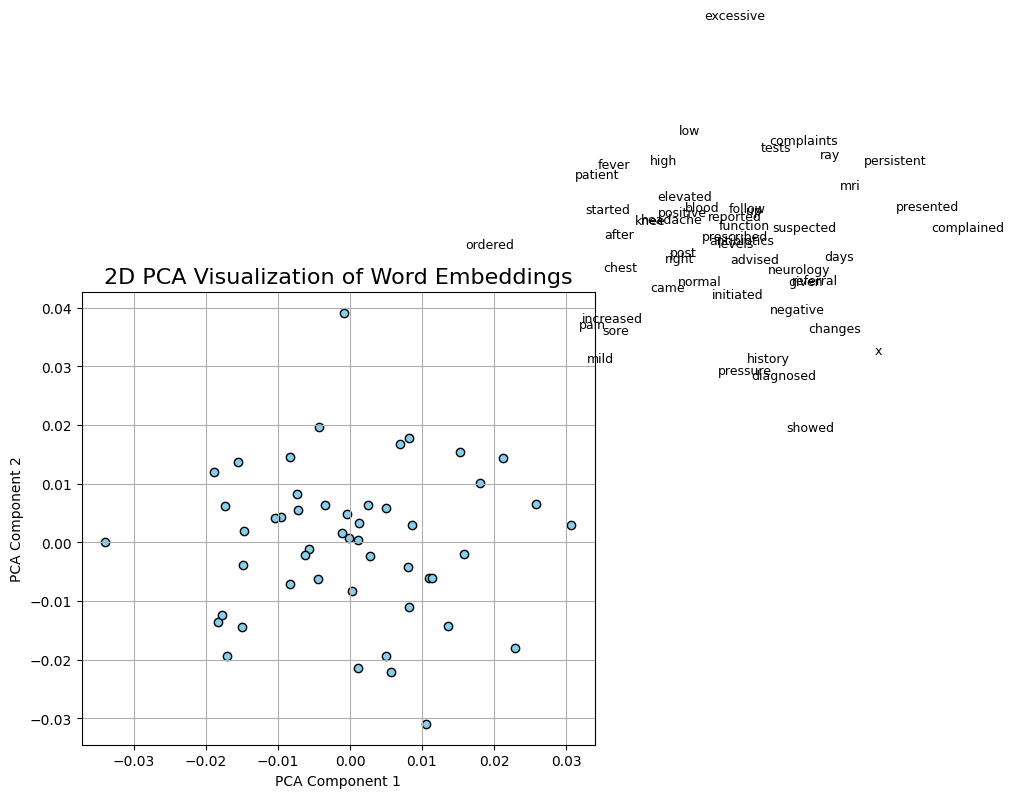

In [ ]:
#PCA + 2D Plot of Word Embeddings
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
#Since huge vocab
top_n = 50
words = model.wv.index_to_key[:top_n]
word_vectors = [model.wv[word] for word in words]

#Let's reduce this 1000D to 2D
pca = PCA(n_components = 2)
reduced = pca.fit_transform(word_vectors)

#Now, after performing PCA, let's plot!
plt.figure(figsize=(14,10))
plt.scatter(reduced[:,0], reduced[:,1], edgecolors = 'k', c = 'skyblue')

#Annotate points with word labels
for i, word in enumerate(words):
    plt.text(reduced[i, 0]+0.05, reduced[i, 1]+0.05, word, fontsize=9)

plt.title("2D PCA Visualization of Word Embeddings", fontsize=16)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.tight_layout()
plt.show()
#history, pressure and diagnosed are similar as per the model of 40 sentences

## Step 6: Conclusion
(ChatGPT theory for self)

In this project, we successfully implemented a Word2Vec model on a set of synthetic clinical notes. Starting from basic preprocessing, we cleaned and tokenized the text data, trained a Skip-Gram Word2Vec model using Gensim, and visualized the resulting word embeddings using PCA.

The learned embeddings revealed meaningful relationships between medical terms, with similar words clustering together in the vector space (e.g., "pain" near "headache", "fever" near "infection"). This confirms that Word2Vec is able to capture contextual semantics even from small-scale clinical-like text.

This project demonstrates how unsupervised learning techniques like Word2Vec can be used for **semantic understanding** in the healthcare domain — a valuable tool for building intelligent clinical NLP systems.
